In [ ]:
!pip install numpy==1.24.4 --no-cache-dir --force-reinstall

Header Information:
SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                43200                                                  
NAXIS2  =                10320                                                  
WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =              21601.0 / Pixel coordinate of reference point            
CRPIX2  =               7561.0 / Pixel coordinate of reference point            
CDELT1  =  -0.0083333333333333 / [deg] Coordinate increment at reference point  
CDELT2  =   0.0083333333333333 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  

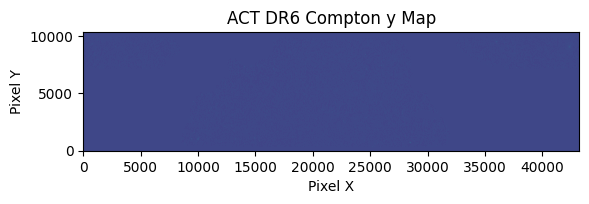

In [4]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from astropy.visualization import ZScaleInterval, ImageNormalize


Home = "/Users/yi/Documents/CMB_SZ"
# Load the FITS file
filename = Home + '/ymap/ilc_actplanck_ymap.fits'
with fits.open(filename) as hdul:
    # Print header information
    header = hdul[0].header
    print("Header Information:")
    print(repr(header))
    
    # Load the data from the primary HDU (Header Data Unit)
    data = hdul[0].data

    hdul.info()
# Plot the data

cmin, cmax = np.min(data), np.max(data)
plt.imshow(data,vmin = cmin, vmax= cmax,  origin='lower', cmap='viridis')
#plt.colorbar(label='Compton y')
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.title('ACT DR6 Compton y Map')
plt.show()


Header Information:
SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                43200                                                  
NAXIS2  =                10320                                                  
WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =              21601.0 / Pixel coordinate of reference point            
CRPIX2  =               7561.0 / Pixel coordinate of reference point            
CDELT1  =  -0.0083333333333333 / [deg] Coordinate increment at reference point  
CDELT2  =   0.0083333333333333 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  

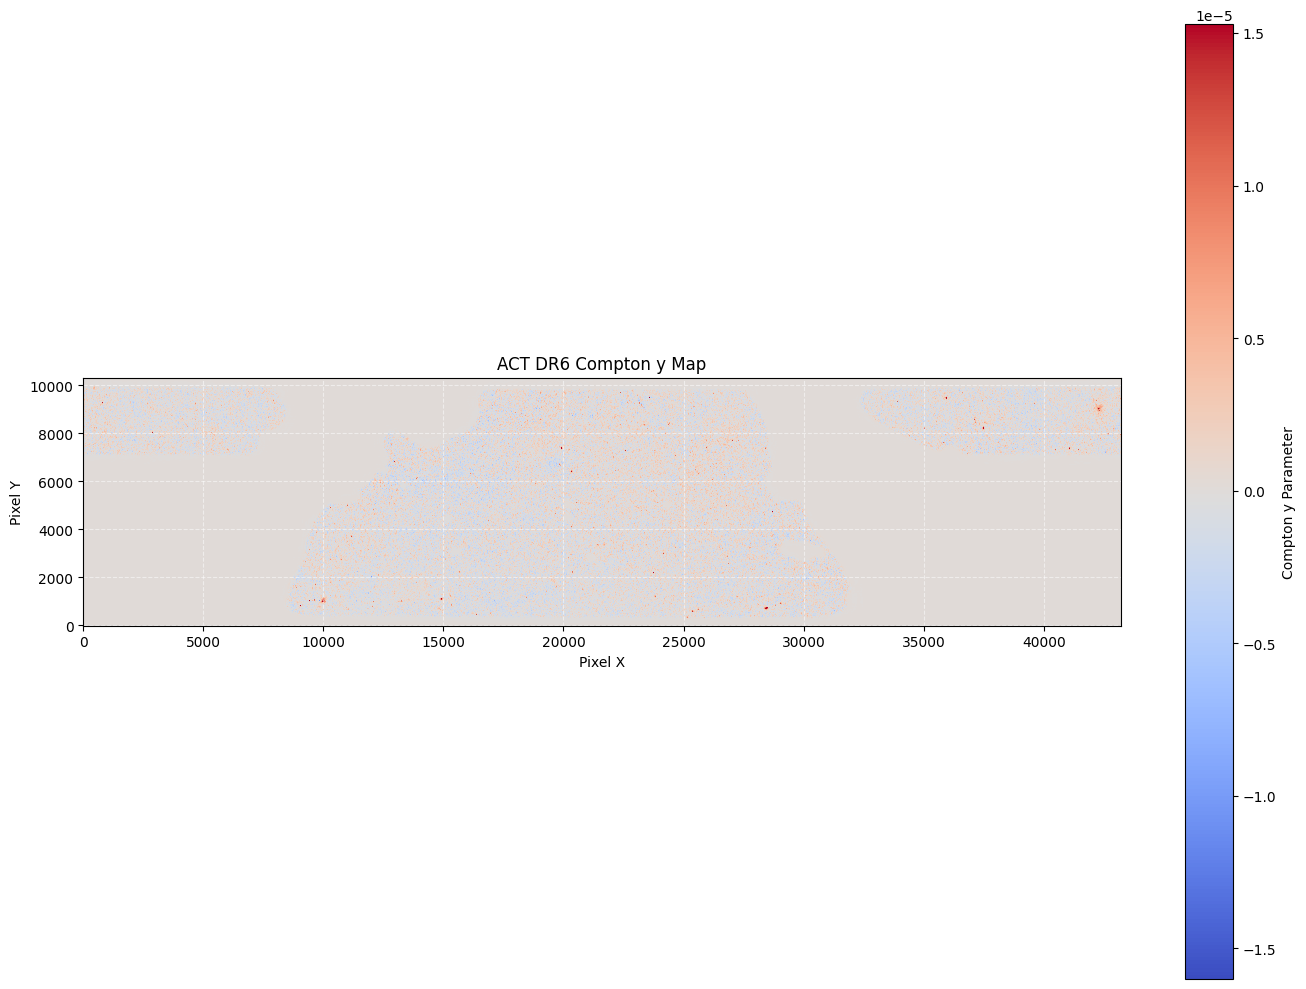

In [40]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from astropy.visualization import ZScaleInterval, ImageNormalize


# Define the path to your data
Home = "/Users/yi/Documents/CMB_SZ"
filename = Home + '/ymap/ilc_actplanck_ymap.fits'

# Load the FITS file
with fits.open(filename) as hdul:
    header = hdul[0].header
    data = hdul[0].data

    # Print some header information for context
    print("Header Information:")
    print(repr(header))
    hdul.info()

# Calculate vmin and vmax using percentiles to ignore outliers
vmin = np.percentile(data, 10)
vmax = np.percentile(data, 90)

# Set up a larger figure size for better visibility
plt.figure(figsize=(14, 10))
plt.imshow(data, origin='lower', cmap='coolwarm', norm = ImageNormalize(data, interval=ZScaleInterval()))
plt.colorbar(label='Compton y Parameter')

# Add axis labels, title, and grid
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.title('ACT DR6 Compton y Map')
plt.grid(color='white', linestyle='--', alpha=0.5)

# Adjust layout to fit everything nicely
plt.tight_layout()
plt.show()


In [ ]:

ZScaleinterval



In [2]:
import numpy as np
from astropy.io import fits
from pixell import enmap
import matplotlib.pyplot as plt

pix_arcmin = 0.5  #each pixel is 0.5 arcmins 
resolution_factor =  1/pix_arcmin 

def extract_submaps(fits_file, catalog_file, output_dir, submap_size=18.0):

    map_data = enmap.read_map(fits_file, hdu=0)
    wcs = map_data.wcs
    
    catalog_hdulist = fits.open(catalog_file)
    catalog_data = catalog_hdulist[1].data

    #ra = catalog_data['RADeg']
    #dec = catalog_data['decDeg']
    mass = catalog_data['M500c']
    
    # below are coordinated copied from table 7 of Hassefield paper
    ra = [2.0418, 3.0152, 3.7276, 4.4138, 4.5623, 5.5553, 6.5699, 11.1076, 11.3051, 12.7875, 14.5189, 14.7855, 16.2195, 19.9971, 21.8227, 24.8407, 28.1764, 29.1008, 31.5567, 33.8699, 34.5626, 34.9533, 34.9759, 35.3925, 35.7939, 37.1250, 37.7273, 39.9718, 40.0102, 40.3129, 41.4645, 42.5370, 44.1354, 45.2925, 45.4158, 45.8343, 47.0481, 50.1239, 51.7075, 54.2438, 55.5008, 55.6845, 57.1612, 57.1605, 306.3006, 312.6264, 312.6814, 312.7935, 312.7885, 313.8581, 314.7234, 322.1036, 322.4186, 322.5367, 323.7907, 323.8151, 323.9310, 328.2375, 328.6319, 329.0407, 335.1922, 337.3042, 343.3432, 345.6427, 346.9176, 351.8660, 354.4156, 357.9349]
    dec = [2.0204, -0.7693, -0.9502, -0.8580, -0.3795, -0.6050, 1.3367, 1.2221, -1.8827, 0.9323, 0.5106, -0.8326, 0.0495, 0.9193, 0.3468, -1.4769, 1.0059, -1.3879, -1.2428, 0.5091, -0.6883, 0.3755, 1.4973, -0.2063, -0.9466, 0.5033, -0.4043, -1.5758, 1.2693, -0.3109, -0.7013, 0.1403, 0.1049, -1.1716, 1.9219, 1.9214, 1.0607, 0.5399, -0.7312, -1.1705, 1.0873, -0.2899, 0.4892, -0.4681, 0.5130, -0.9311, 1.3857, 0.9488, 2.2628, 1.0985, 1.3836, 1.5996, 0.0891, 0.7590, -1.0396, 1.4247, 0.1568, -1.2458, -0.8197, 1.3857, -0.7095, -0.0743, -0.5280, 0.0419, 1.5161, -2.0777, 0.2690, 0.1538]
    
    # Define submap size in arcminutes and convert to radians
    submap_size_rad = np.deg2rad(submap_size / 60.0)

    
    for i, (ra_source, dec_source) in enumerate(zip(ra, dec)):

        pos = np.deg2rad([dec_source, ra_source])  # [DEC, RA] in radians
        # bounding box for the submap
        box = np.array([[pos[0] - submap_size_rad / 2, pos[1] - submap_size_rad / 2],
                        [pos[0] + submap_size_rad / 2, pos[1] + submap_size_rad / 2]])
        
        submap = enmap.submap(map_data, box=box)

        # Save the submap to a FITS file
        submap_filename = f"{output_dir}/submap_{i}.fits"
        enmap.write_map(submap_filename, submap)
    
        
    

    print("Submaps extraction completed.")

In [3]:

fits_file = filename = Home + '/ymap/ilc_actplanck_ymap.fits'
catalog_file = '/Users/yi/Documents/CMB_SZ/DR5_cluster-catalog_v1.1.fits'
output_dir = "/Users/yi/Documents/CMB_SZ/ymap/Hasselfield_submap/"
extract_submaps(fits_file, catalog_file, output_dir)

NameError: name 'Home' is not defined

Plotting submap: /Users/yi/Documents/CMB_SZ/ymap/Hasselfield_submap/submap_1.fits
Plotting submap: /Users/yi/Documents/CMB_SZ/ymap/Hasselfield_submap/submap_2.fits
Plotting submap: /Users/yi/Documents/CMB_SZ/ymap/Hasselfield_submap/submap_3.fits
Plotting submap: /Users/yi/Documents/CMB_SZ/ymap/Hasselfield_submap/submap_4.fits
Plotting submap: /Users/yi/Documents/CMB_SZ/ymap/Hasselfield_submap/submap_5.fits
Plotting submap: /Users/yi/Documents/CMB_SZ/ymap/Hasselfield_submap/submap_6.fits
Plotting submap: /Users/yi/Documents/CMB_SZ/ymap/Hasselfield_submap/submap_7.fits
Plotting submap: /Users/yi/Documents/CMB_SZ/ymap/Hasselfield_submap/submap_8.fits


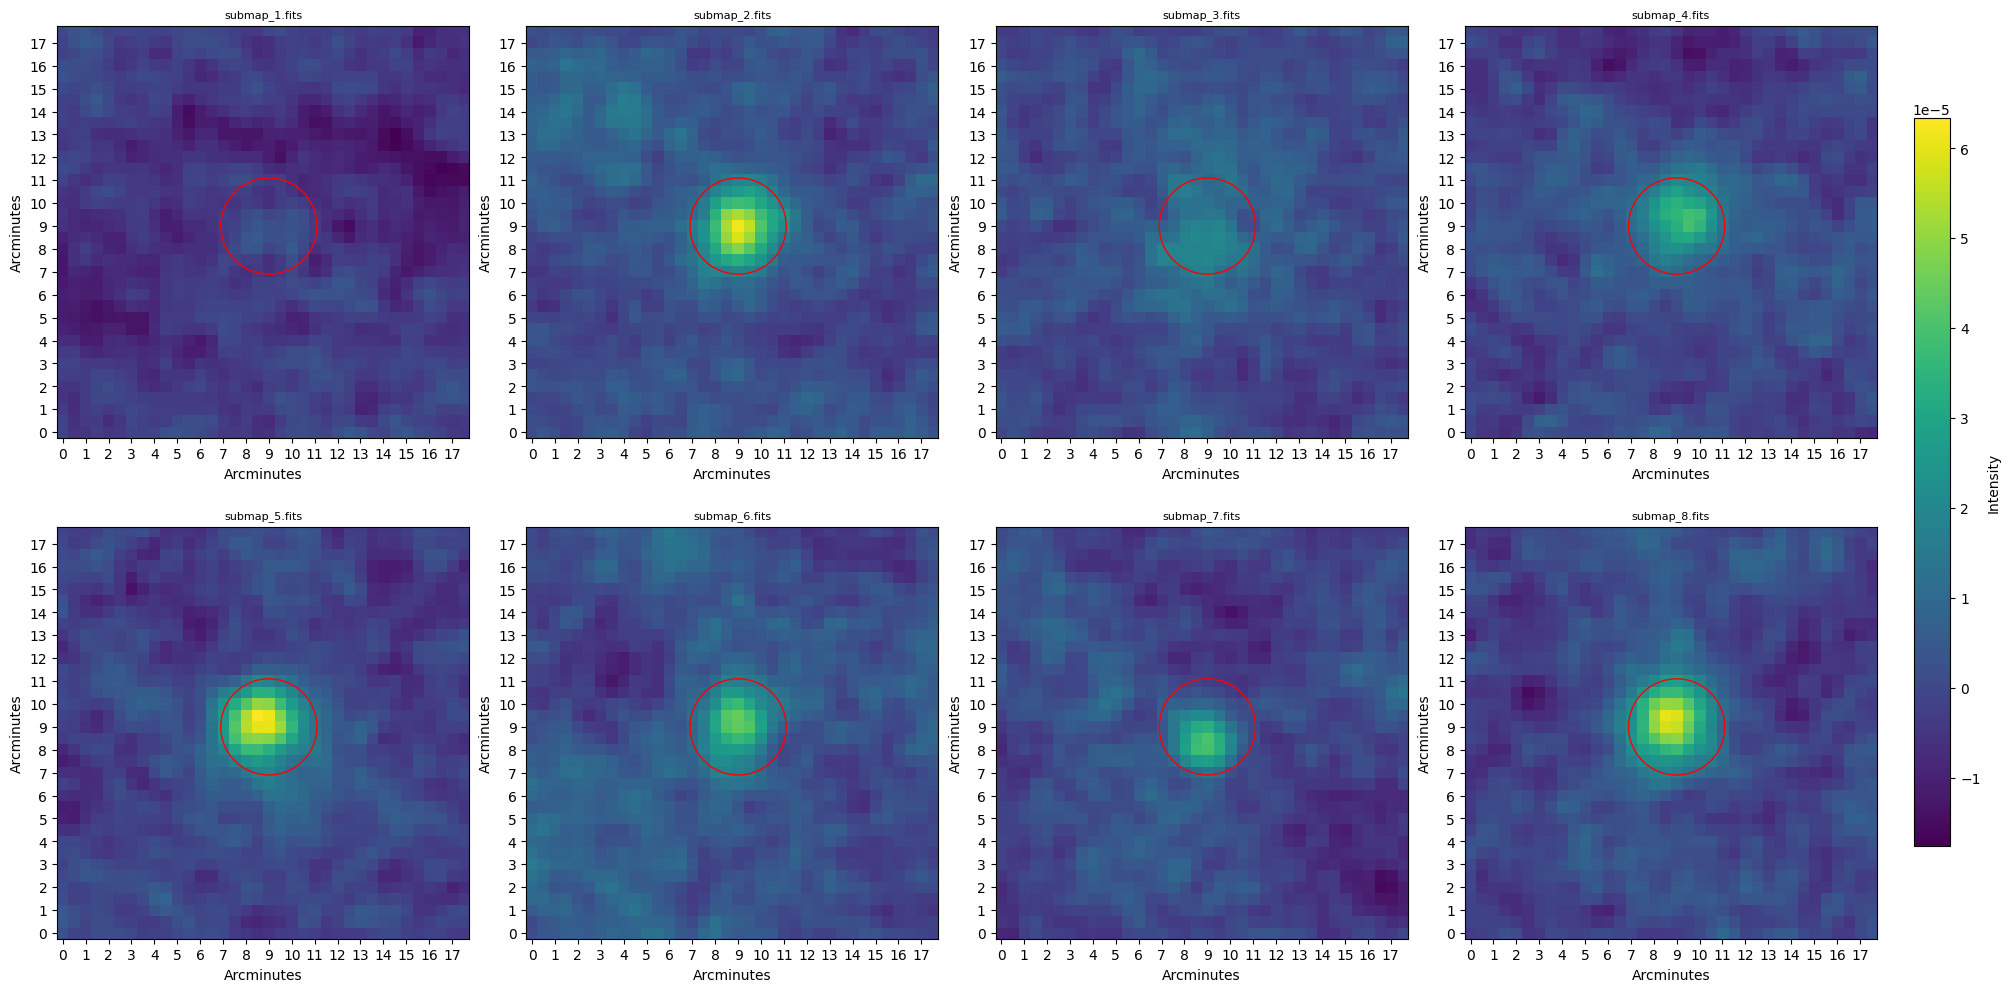

In [7]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from pixell import enmap

def plot_single_submap(ax, submap_file, radius, vmin=None, vmax=None):
    submap = enmap.read_map(submap_file)
    print(f"Plotting submap: {submap_file}")

    if len(submap.shape) > 2:
        submap = submap[0]

    # Set ticks every 2 pixels by resolution factor

    ax.set_xticks(np.arange(0, submap.shape[1], resolution_factor))
    ax.set_yticks(np.arange(0, submap.shape[0], resolution_factor))

    # Adjust tick labels to count every 2 pixels as one unit
    ax.set_xticklabels(np.arange(0, submap.shape[1] // 2))
    ax.set_yticklabels(np.arange(0, submap.shape[0] // 2))
    
    im = ax.imshow(submap, origin='lower', cmap='viridis', vmin=vmin, vmax=vmax)
    circle = plt.Circle((submap.shape[1]//2, submap.shape[0]//2), radius, color='r', fill=False)
    ax.add_artist(circle)
    ax.set_title(submap_file.split('/')[-1], fontsize=8)  # Label by file name
    ax.set_xlabel('Arcminutes')
    ax.set_ylabel('Arcminutes')
    ax.grid(False)
    return im

def plot_multiple_submaps(submap_files, radius, nrows, ncols, figsize=(20, 10), output_file='submaps_table.png'):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, constrained_layout=True)
    axes = axes.flatten()  # Flatten the axes array for easy iteration
    
    # Find global min and max for consistent color scaling
    min_val, max_val = np.inf, -np.inf
    for submap_file in submap_files:
        submap = enmap.read_map(submap_file)
        if len(submap.shape) > 2:
            submap = submap[0]
        min_val = min(min_val, submap.min())
        max_val = max(max_val, submap.max())
    
    # Plot each submap
    for i, submap_file in enumerate(submap_files):
        if i < len(axes):  # Ensure we don't try to plot more submaps than subplots
            im = plot_single_submap(axes[i], submap_file, radius, vmin=min_val, vmax=max_val)
    
    # Hide any remaining empty subplots
    for i in range(len(submap_files), len(axes)):
        axes[i].axis('off')
    
    # Add a single color bar on the right-hand side
    cbar = fig.colorbar(im, ax=axes, orientation='vertical', fraction=0.02, pad=0.02)
    cbar.set_label('Intensity')

    plt.savefig(output_file, bbox_inches='tight')
    plt.show()

# Example usage
submap_files = [
    "/Users/yi/Documents/CMB_SZ/ymap/Hasselfield_submap/submap_1.fits",
    "/Users/yi/Documents/CMB_SZ/ymap/Hasselfield_submap/submap_2.fits",
    "/Users/yi/Documents/CMB_SZ/ymap/Hasselfield_submap/submap_3.fits",
    "/Users/yi/Documents/CMB_SZ/ymap/Hasselfield_submap/submap_4.fits",
    "/Users/yi/Documents/CMB_SZ/ymap/Hasselfield_submap/submap_5.fits",
    "/Users/yi/Documents/CMB_SZ/ymap/Hasselfield_submap/submap_6.fits",
    "/Users/yi/Documents/CMB_SZ/ymap/Hasselfield_submap/submap_7.fits",
    "/Users/yi/Documents/CMB_SZ/ymap/Hasselfield_submap/submap_8.fits",

]
radius = 2.1*resolution_factor
plot_multiple_submaps(submap_files, radius, nrows=2, ncols=4)




In [8]:
import numpy as np
from astropy.io import fits
from pixell import enmap
import os

def stack_submaps(submap_dir, output_file):
    # List all submap 
    submap_files = [os.path.join(submap_dir, f) for f in os.listdir(submap_dir) if f.endswith('.fits')]
    
    #get shape and initialize the stack
    first_submap = enmap.read_map(submap_files[0])
    stack = np.zeros_like(first_submap)
    count = 0
    

    for submap_file in submap_files:
        submap = enmap.read_map(submap_file)
        stack += submap
        count += 1
    
    # Average 
    stack /= count
    
    enmap.write_map(output_file, stack)
    print(f"Stacking completed. Stacked map saved as {output_file}")


submap_dir = "/Users/yi/Documents/CMB_SZ/ymap/Hasselfield_submap/"
output_file = "/Users/yi/Documents/CMB_SZ/stacked_map_hasselfield.fits"
stack_submaps(submap_dir, output_file)

Stacking completed. Stacked map saved as /Users/yi/Documents/CMB_SZ/stacked_map_hasselfield.fits


Extracted tSZ signal: 1.1520523912622593e-05


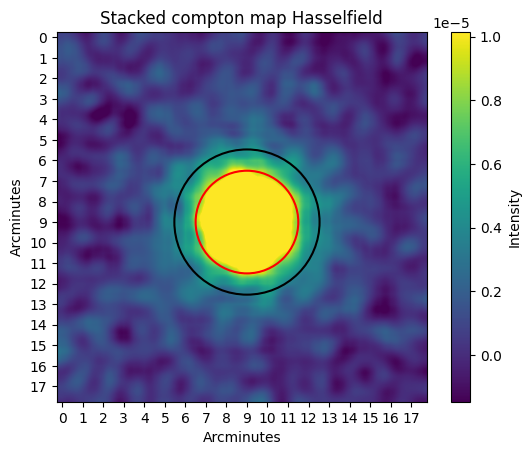

In [50]:
import scipy.ndimage

stacked_map = enmap.read_map("/Users/yi/Documents/CMB_SZ/stacked_map_hasselfield.fits")


#stacked_map = stacked_map[0]
def circular_mask(h, w,center=None, radius=None):
    if center is None:  # use the middle of the image
        center = [int(h/2), int(w/2)]
    if radius is None:  # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], h-center[0], w-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[1])**2 + (Y - center[0])**2)

    mask = dist_from_center <= radius
    return mask

def ring_mask(h, w,center=None, radius_inner=None, radius_outter = None ):
    if center is None:  # use the middle of the image
        center = [int(h/2), int(w/2)]

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[1])**2 + (Y - center[0])**2)

    mask = (dist_from_center <= radius_outter) & (dist_from_center >= radius_inner)
    return mask

radius = 2.5*2 # adjust this value as needed
radius_out  = radius*np.sqrt(2)
h, w = stacked_map.shape

mask = circular_mask(h, w, radius=radius)
mask_outter_ring = ring_mask(h, w, radius_inner=radius, radius_outter = radius_out)
tsz_signal_inner = np.mean(stacked_map[mask])
tsz_signal_outter_ring = np.mean(stacked_map[mask_outter_ring])
tsz_signal = tsz_signal_inner - tsz_signal_outter_ring

print(f"Extracted tSZ signal: {tsz_signal}")

# Optionally, plot the masked region
plt.imshow(stacked_map,cmap='viridis', norm = ImageNormalize(stacked_map, interval=ZScaleInterval()), interpolation="sinc")
#lt.colorbar(label='tSZ signal') vmin =-1.5e-5,
#plt.contour(mask_outter_ring,colors='red', linewidths=0.5)

radius = 2.5* resolution_factor  # arcmins
outter_radius = radius*np.sqrt(2)
circle = plt.Circle(
    (stacked_map.shape[1] // 2, stacked_map.shape[0] // 2), 
    radius, color='r', fill=False, linewidth=1.5
)
circle_outter = plt.Circle(
    (stacked_map.shape[1] // 2, stacked_map.shape[0] // 2), 
    outter_radius, color='black', fill=False, linewidth=1.5
)

# Add the circle to the plot
ax = plt.gca()
ax.add_artist(circle)
ax.add_artist(circle_outter)
# Set ticks every 2 pixels by resolution factor

ax.set_xticks(np.arange(0, stacked_map.shape[1], resolution_factor))
ax.set_yticks(np.arange(0, stacked_map.shape[0], resolution_factor))

# Adjust tick labels to count every 2 pixels as one unit
ax.set_xticklabels(np.arange(0, stacked_map.shape[1] // 2))
ax.set_yticklabels(np.arange(0, stacked_map.shape[0] // 2))
cbar = plt.colorbar(orientation='vertical')
cbar.set_label('Intensity')
# Set titles and labels
plt.title('Stacked compton map Hasselfield')
plt.xlabel('Arcminutes')
plt.ylabel('Arcminutes')

# Display the plot
plt.show()